# Which diamonds are your type? - Clustering diamonds

In this notebook we will use unsupervised learning to find certain types of diamonds using:
* K-Means
* Hierarchical clustering
* Spectral clustering
* Multi View learning
* Manifold learning

# Dataset
We have 10 variables, 7 are numerical and 3 are categorical.
* cut - quality of the cut (cuts can be very different but the type of cut isn't included)
* color - color of diamond, colors DEF are colorless, GHIJ nearly colorless (in real life colors go to Z, Z colored diamonds are greenish)
* clarity -  
  * IF - internally flawless - no inclusions visible under 10x magnification (Absent in data)
  * Very, Very Slightly Included (VVS1 and VVS2) - inclusions so slight they are difficult for a skilled grader to see under 10x magnification
  * Very Slightly Included (VS1 and VS2) - inclusions are observed with effort under 10x magnification, but can be characterized as minor
  * Slightly Included (SI1 and SI2) - inclusions are noticeable under 10x magnification
  * Included (I1, I2, and I3) - inclusions are obvious under 10x magnification which may affect transparency and brilliance
* x, y, z - dimensions of a diamond in mm
* depth - 2*z/(x+y)
* table - the best described on the picture
* carats - amount of carats, carat is a unit mass for gemstones equal to 0.2 gram

![Picture of a diamond](diax.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("fivethirtyeight")


In [21]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [2]:
df = pd.read_csv("diamonds.csv", index_col=0).reset_index(drop=True)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA
I'll create a histogram/countplot of every variable to get a better understanding of the data.

Text(0.5, 0, 'Carat')

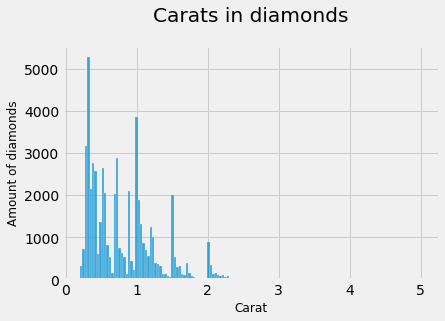

In [3]:
sns.histplot(df.carat)
plt.title("Carats in diamonds", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("Carat", fontsize=12)


Text(0.5, 0, 'Price')

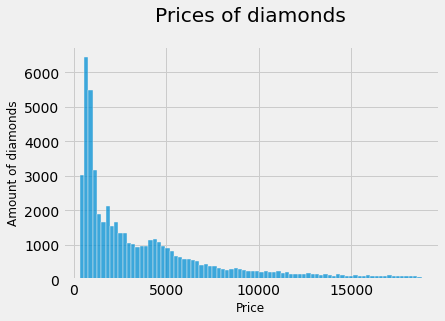

In [4]:
sns.histplot(df.price)
plt.title("Prices of diamonds", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("Price", fontsize=12)


Text(0.5, 0, 'depth')

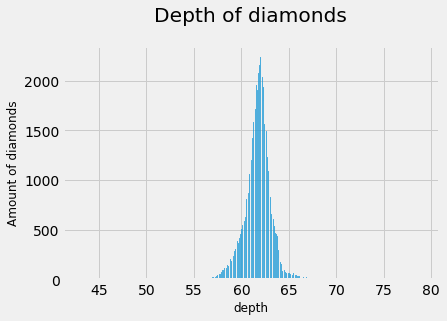

In [5]:
sns.histplot(df.depth)
plt.title("Depth of diamonds", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("depth", fontsize=12)


(50.0, 68.0)

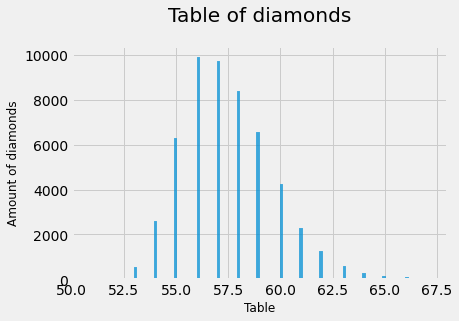

In [6]:
sns.histplot(df.table)
plt.title("Table of diamonds", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("Table", fontsize=12)
plt.xlim([50,68])

Text(0.5, 0, 'Cut')

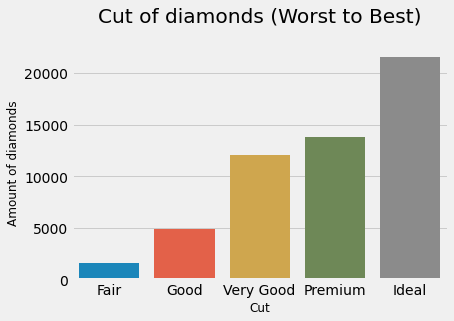

In [7]:
sns.countplot(x="cut", data=df, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.title("Cut of diamonds (Worst to Best)", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("Cut", fontsize=12)


Text(0.5, 0, 'clarity')

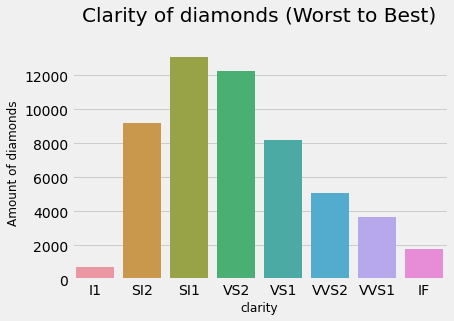

In [8]:
sns.countplot(
    x="clarity", data=df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
)
plt.title("Clarity of diamonds (Worst to Best)", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("clarity", fontsize=12)


Text(0.5, 0, 'color')

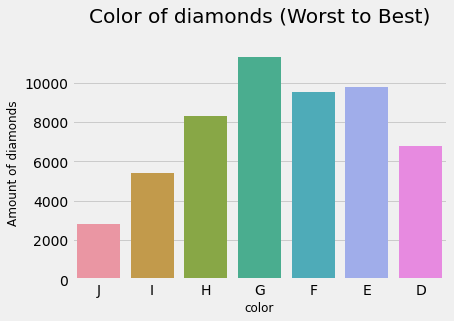

In [9]:
sns.countplot(x="color", data=df, order=["J", "I", "H", "G", "F", "E", "D"])
plt.title("Color of diamonds (Worst to Best)", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("color", fontsize=12)


### We found some interesting insights!

Depth, table, colors, clarity - all look similar to a normal distribution

Price has a power distribution

Very little amount of diamonds have a bad cut.

In [10]:
# take the log of price values
df["price_log"] = np.log1p(df.price)

Text(0.5, 0, 'Log_Price')

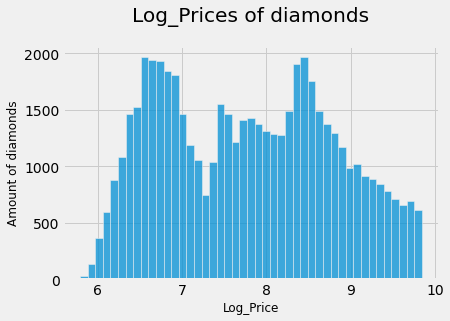

In [11]:
sns.histplot(df.price_log)
plt.title("Log_Prices of diamonds", y=1.08)  # y pads the title upward
plt.ylabel("Amount of diamonds", fontsize=12)
plt.xlabel("Log_Price", fontsize=12)

# K-Means

Creates clusters based on lowest distance withing a cluster.
K stands for amount of clusters. 

Good way to find K is to plot sum of squared errors for many different K values and find the "elbow". Point at which decrease in SSE diminishes.

KMeans assumes that clusters are roughly equal sizes and arent spherical

In [12]:
from sklearn.cluster import KMeans

In [13]:
# copy the dataframe to deal with SettingWithCopy warning
df_kmeans = df.copy()

# One hot encode categorical variables
clarities = pd.get_dummies(df.clarity)
cuts = pd.get_dummies(df.cut)
colors = pd.get_dummies(df.color)
df_kmeans = pd.concat([df_kmeans, clarities, cuts, colors], axis=1)
df_kmeans.drop(["clarity", "cut", "color", "price"], axis=1, inplace=True)
df_kmeans.head()

,carat,depth,table,x,y,z,price_log,I1,IF,SI1,...,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,0.23,61.5,55.0,3.95,3.98,2.43,5.789960,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,5.789960,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,5.793014,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,5.814131,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,5.817111,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:

sse = {}
# Find SSE in clusters of size from 2 to 10.
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_kmeans)
    sse[k] = km.inertia_


In [15]:
sse

{2: 538160.9819928262,
 3: 431367.8500773796,
 4: 382012.82541791786,
 5: 348582.9929414963,
 6: 325538.0933937348,
 7: 310207.57941711467,
 8: 297319.5877477507,
 9: 285926.96999707696,
 10: 275401.61114631436}

<AxesSubplot:>

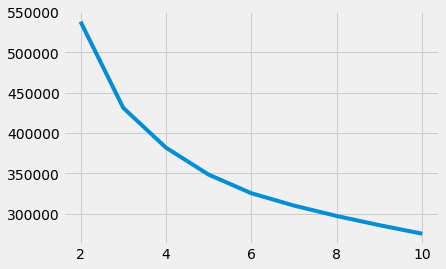

In [16]:
sns.lineplot(x=sse.keys(), y=sse.values())

In [17]:
# Elbow point occured at K=4
km = KMeans(n_clusters=4, random_state=42)
clusters = km.fit_predict(df_kmeans)
df_kmeans["cluster"] = clusters

In [18]:
df_kmeans

,carat,depth,table,x,y,z,price_log,I1,IF,SI1,...,Premium,Very Good,D,E,F,G,H,I,J,cluster
0,0.23,61.5,55.0,3.95,3.98,2.43,5.789960,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1,0.21,59.8,61.0,3.89,3.84,2.31,5.789960,0,0,1,...,1,0,0,1,0,0,0,0,0,2
2,0.23,56.9,65.0,4.05,4.07,2.31,5.793014,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,0.29,62.4,58.0,4.20,4.23,2.63,5.814131,0,0,0,...,1,0,0,0,0,0,0,1,0,2
4,0.31,63.3,58.0,4.34,4.35,2.75,5.817111,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,7.922261,0,0,1,...,0,0,1,0,0,0,0,0,0,3
53936,0.72,63.1,55.0,5.69,5.75,3.61,7.922261,0,0,1,...,0,0,1,0,0,0,0,0,0,3
53937,0.70,62.8,60.0,5.66,5.68,3.56,7.922261,0,0,1,...,0,1,1,0,0,0,0,0,0,2
53938,0.86,61.0,58.0,6.15,6.12,3.74,7.922261,0,0,0,...,1,0,0,0,0,0,1,0,0,1


# Hierarchical clustering

Can be visualized using the dendrogram

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


SyntaxError: invalid syntax (1526089047.py, line 4)

In [123]:
# function taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [127]:
# ward linkage - minimizes the variance of the clustering being merged
hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc.fit(df_kmeans)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

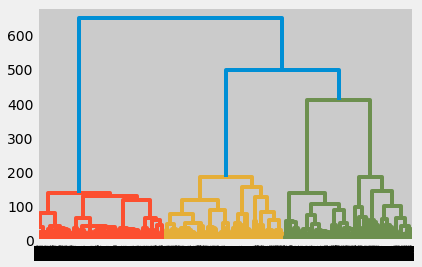

In [128]:
plot_dendrogram(hc)

Even though some parts of the dendrogram look unintelligible, we can see that there are 3 different clusters.

# Spectral clustering
Doesn't assume clusters to be of any certain shape.

We will check for the amount of clusters using the Eigengap heuristic.

In [22]:
from sklearn.cluster import SpectralClustering

In [26]:
sc = SpectralClustering(n_clusters=4, random_state=42, n_jobs=-1)
sc.fit(df_kmeans)